In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=True, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

### torch中，channel位于第一个维度
### 进行transpose之后才能正常显示

horse   cat  frog truck


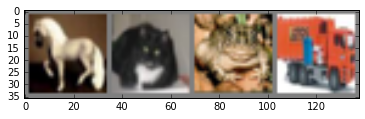

In [3]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [4]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.Conv1 = nn.Conv2d(3, 6, 5)
        self.Pool = nn.MaxPool2d(2)
        self.Conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.Pool(F.relu(self.Conv1(x)))
        x = self.Pool(F.relu(self.Conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        return x

In [5]:
model = Net()

In [6]:
import torch.optim as optim
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
loss_fn = nn.CrossEntropyLoss()

In [7]:
for epoch in range(5):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        # wrap them in Variable
        inputs, labels = Variable(inputs), Variable(labels)
        y_pred = model.forward(inputs)
        loss = loss_fn(y_pred, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.data[0]
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.299
[1,  4000] loss: 2.158
[1,  6000] loss: 1.784
[1,  8000] loss: 1.650
[1, 10000] loss: 1.570
[1, 12000] loss: 1.518
[2,  2000] loss: 1.433
[2,  4000] loss: 1.392
[2,  6000] loss: 1.372
[2,  8000] loss: 1.359
[2, 10000] loss: 1.303
[2, 12000] loss: 1.274
[3,  2000] loss: 1.214
[3,  4000] loss: 1.222
[3,  6000] loss: 1.231
[3,  8000] loss: 1.183
[3, 10000] loss: 1.204
[3, 12000] loss: 1.194
[4,  2000] loss: 1.105
[4,  4000] loss: 1.127
[4,  6000] loss: 1.103
[4,  8000] loss: 1.118
[4, 10000] loss: 1.103
[4, 12000] loss: 1.110
[5,  2000] loss: 1.006
[5,  4000] loss: 1.043
[5,  6000] loss: 1.035
[5,  8000] loss: 1.037
[5, 10000] loss: 1.037
[5, 12000] loss: 1.041
Finished Training


In [8]:
import torch
from torch.autograd import Variable as Variable
import torch.nn as nn

n_batch = 64
n_in, n_hidden, n_out = 200, 64, 20

x = Variable(torch.randn(n_batch, n_in))
y = Variable(torch.randn(n_batch, n_out))

from torch.nn import Sequential as Sequential

model = Sequential(
    nn.Linear(n_in, n_hidden),
    nn.ReLU(),
    nn.Linear(n_hidden, n_out)
)

loss_fn = torch.nn.MSELoss(size_average = False)
optimizer = torch.optim.SGD(model.parameters(), lr = 1e-4)

for i in range(500):
    y_pred = model(x)
    # target在后
    loss = loss_fn(y_pred, y)
    if i % 100 == 99:
        print(loss.data[0])
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

303.75244140625
61.804725646972656
17.956628799438477
6.574244499206543
2.768749952316284


### 定义一个class

In [9]:
import torch
from torch.autograd import Variable as Variable
import torch.nn as nn
import torch.nn.functional as F
n_batch = 64
n_in, n_hidden, n_out = 200, 64, 20

x = Variable(torch.randn(n_batch, n_in))
y = Variable(torch.randn(n_batch, n_out))

from torch.nn import Sequential as Sequential

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(n_in, n_hidden)
        self.fc2 = nn.Linear(n_hidden, n_out)
    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return x

model = Net()

loss_fn = torch.nn.MSELoss(size_average = False)
optimizer = torch.optim.SGD(model.parameters(), lr = 1e-4)

for i in range(500):
    y_pred = model.forward(x)
    # target在前
    loss = loss_fn(y_pred, y)
    if i % 99 == 0:
        print(loss.data[0])
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

1394.3814697265625
318.2494812011719
62.49140167236328
16.9277400970459
5.602036476135254
2.0348317623138428


### 在训练的过程中对每一个layer设置特定的学习率

### 会从nn.Module中继承一个__call__函数
### 可以直接调用

In [12]:
import torch
from torch.autograd import Variable as Variable
import torch.nn as nn
import torch.nn.functional as F
n_batch = 64
n_in, n_hidden, n_out = 200, 64, 20

x = Variable(torch.randn(n_batch, n_in))
y = Variable(torch.randn(n_batch, n_out))

from torch.nn import Sequential as Sequential

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(n_in, n_hidden)
        self.fc2 = nn.Linear(n_hidden, n_hidden)
        self.fc3 = nn.Linear(n_hidden, n_out)
    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        return x

model = Net()


loss_fn = torch.nn.MSELoss(size_average = False)


#fc1学习率1e-3
#fc2学习率5e-3
#没有设置的fc3使用默认的1e-4

optimizer = torch.optim.SGD([
        {'params':model.fc1.parameters(), 'lr' : 1e-3},
        {'params':model.fc2.parameters(), 'lr' : 5e-3}],
                             lr = 1e-4)

for i in range(500):
    y_pred = model(x)
    # y_pred = model.forward(x)
    # target在前
    loss = loss_fn(y_pred, y)
    if i % 99 == 0:
        print(loss.data[0])
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

1316.7772216796875
79.83851623535156
15.491230964660645
4.795407772064209
2.698829412460327
1.6205554008483887
